<a href="https://colab.research.google.com/github/ArcticFoox/optimization/blob/main/adaptive_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Lec_NADL] 05/31**(수업후 공지)
- **적응형 알고리즘**의 'SGD 알고리즘' 대비 **변경(추가)된 부분에 대해 주석처리(표기: '''#(추가or변경) ... ''' )** 되어 있습니다.  
- 해당 **주석처리 기호(''' ''')를 삭제 후 '적응형 알고리즘 실행'**해 보세요.




#수치 최적화 알고리즘
I. GD: 경사 하강 (Gradient Descent)

II. **Stochastic GD (SGD): 확률적 경사 하강**

III. **Adam: 적응형 알고리즘 (Hybrid: Momentum 방법 & RMSProp 방법)**

## **II. 확률적 경사 하강 (SGD)**
- GD 대비 주요한 차이점
  - **탐색방향 결정(계산) 방법**

- 주요 용어
  - **배치**(batch) / **배치 크기**(batch size)
  - **epoch**(시대,에포크) (vs. iteration(반복))

* epoch:  learning 알고리즘에서'모든 training dataset'이 1회 사용되는 과정(단위)을 의미함.

#Review: GD(선형회귀문제)
-  손실함수 & 탐색방향(손실함수의 gradient)

# 알고리즘 비교: **GD vs SGD**
- **GD: iteration**
  - 탐색방향 계산에 사용되는 '자료 수'?

- **SGD: epoch, batch(minibatch) 크기**
  - 각 배치에서 '탐색방향 계산에 사용되는 자료 수'?

- Deep Learning 활용 예: image classification
  - data: images
  - CIFAR10 [웹자료](https://www.cs.toronto.edu/~kriz/cifar.html)
    - 60,000 images (6,000 per class; 10 classes)
  - TensorFlow (시각화된 자료) [웹자료](https://www.tensorflow.org/datasets/catalog/cifar10)
  - PyTorch [웹자료](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

## **비교: GD vs SGD**

---
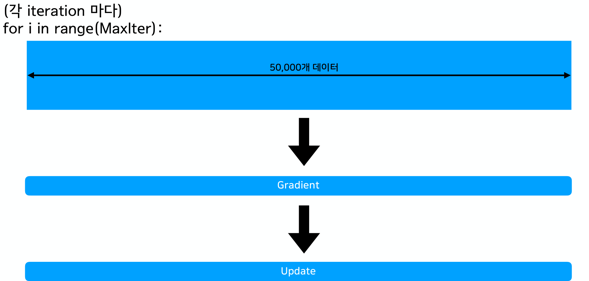




---

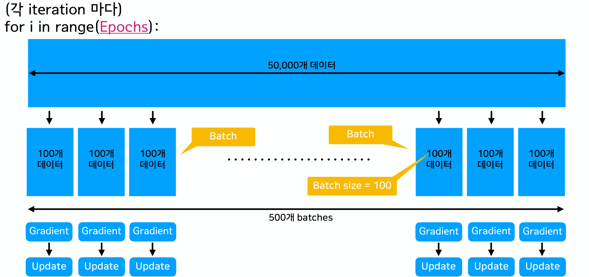



# **SGD: Part-A**

### Part(1): 자료(training data) 생성

[-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26530612  0.30612245  0.34693878  0.3877551   0.42857143
  0.46938776  0.51020408  0.55102041  0.59183673  0.63265306  0.67346939
  0.71428571  0.75510204  0.79591837  0.83673469  0.87755102  0.91836735
  0.95918367  1.        ]

[0.78574159 0.62279481 0.93814004 0.72150122 0.86499739 0.85115953
 0.63109945 0.67370079 0.90634104 0.7042696  0.75735387 1.09007932
 0.94743363 0.92818283 1.06045081 0.99368385 1.06051158 1.21971149
 1.08782982 1.04038442 1.23899142 1.14773768 1.31747766 1.32483893
 1.34687377 1.37697682 1.1934449  1.13853236 1.2355545  1.22705389
 1.25411949 1.1516581  1.51647387 1.38753167 1.5511003

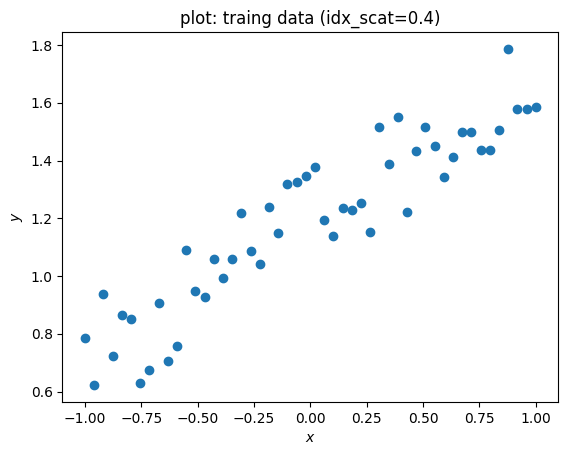

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(320)

x_train = np.linspace(-1, 1, 50)
f = lambda x: 0.5 * x + 1.0

idx_scat = 0.4
y_train = f(x_train) + idx_scat * np.random.rand(len(x_train))

print(x_train)
print()
print(y_train)

#DIY(1)
plt.figure()
plt.plot(x_train, y_train, 'o')
# title,labels
plt.title('plot: traing data (idx_scat=0.4)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


### Part(2): 주요함수 정의 (손실함수 & 탐색방향)

In [ ]:
# 손실함수
def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0

    for i in range(len(x_set)):
        val += ( w[0] * x_set[i] + w[1] - y_set[i] )**2

    return val / N

#손실함수의 그래디언트
def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))

    for i in range(len(x_set)):
        ## DIY(2)
        er = 2*(w[0] * x_set[i] + w[1] - y_set[i])
        val += er * np.array([x_set[i], 1.0])

    return val / N

### Part(3): batch 생성을 위한 전처리 단계
- 자료 섞기(shuffle)

In [ ]:
idx = np.arange(len(x_train))
print(idx)
np.random.shuffle(idx)
print(idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[32 17 47 33  1  7 23 19 21 40  3 14 18  0  4 12 42 41 25 10  2 36 31  6
 16 24 11 22 45 46 49 15 38 48  8 37 30  9 35 13 28 34 29 27 39 26 20 44
  5 43]


### Part(4): 함수 정의(batch 생성)



In [ ]:
def generate_batches(batch_size, features, labels):
    out_batches = []
    sample_size = len(features)

    for start_i in range(0, sample_size, batch_size):

        ## DIY(3)
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]

        out_batches.append(batch)
    return out_batches

## Part(5): batch 생성
  - 배치 크기(예): 3

In [ ]:
chosen_batchsize = 5

for x_batch, y_batch in generate_batches(chosen_batchsize, x_train, y_train):
    print(x_batch, y_batch)

[-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469] [0.78574159 0.62279481 0.93814004 0.72150122 0.86499739]
[-0.79591837 -0.75510204 -0.71428571 -0.67346939 -0.63265306] [0.85115953 0.63109945 0.67370079 0.90634104 0.7042696 ]
[-0.59183673 -0.55102041 -0.51020408 -0.46938776 -0.42857143] [0.75735387 1.09007932 0.94743363 0.92818283 1.06045081]
[-0.3877551  -0.34693878 -0.30612245 -0.26530612 -0.2244898 ] [0.99368385 1.06051158 1.21971149 1.08782982 1.04038442]
[-0.18367347 -0.14285714 -0.10204082 -0.06122449 -0.02040816] [1.23899142 1.14773768 1.31747766 1.32483893 1.34687377]
[0.02040816 0.06122449 0.10204082 0.14285714 0.18367347] [1.37697682 1.1934449  1.13853236 1.2355545  1.22705389]
[0.2244898  0.26530612 0.30612245 0.34693878 0.3877551 ] [1.25411949 1.1516581  1.51647387 1.38753167 1.55110038]
[0.42857143 0.46938776 0.51020408 0.55102041 0.59183673] [1.22031966 1.43410404 1.51725848 1.45144753 1.34402611]
[0.63265306 0.67346939 0.71428571 0.75510204 0.79591837] [1.413

## **Part(6): SGD Algo**
- 선택(설정)되어야 하는 변수
  - 배치크기
  - 학습률  --> 고정된 값 이용
  - 에포크(epoch) --> epoch 최대 수

[0. 0.]
[-0.63265306  0.51020408 -1.          0.18367347 -0.71428571 -0.95918367
  0.95918367  0.67346939 -0.3877551  -0.83673469 -0.42857143 -0.55102041
 -0.67346939  0.79591837 -0.10204082  0.02040816  0.06122449  0.87755102
 -0.14285714  0.2244898   0.59183673 -0.06122449 -0.26530612  0.55102041
  0.30612245 -0.02040816  0.3877551  -0.51020408  0.26530612  0.10204082
 -0.18367347  0.75510204  0.91836735 -0.2244898   0.71428571  0.46938776
 -0.34693878 -0.75510204 -0.87755102  0.34693878  0.83673469  0.42857143
  0.63265306 -0.30612245  1.         -0.79591837  0.14285714 -0.59183673
 -0.91836735 -0.46938776]

[0.7042696  1.51725848 0.78574159 1.22705389 0.67370079 0.62279481
 1.57728913 1.49735717 0.99368385 0.86499739 1.06045081 1.09007932
 0.90634104 1.43661817 1.31747766 1.37697682 1.1934449  1.78654459
 1.14773768 1.25411949 1.34402611 1.32483893 1.08782982 1.45144753
 1.51647387 1.34687377 1.55110038 0.94743363 1.1516581  1.13853236
 1.23899142 1.43479366 1.57711856 1.04038442 1

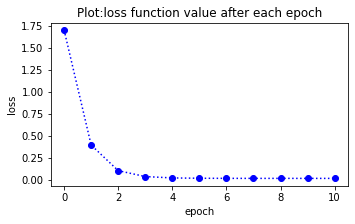

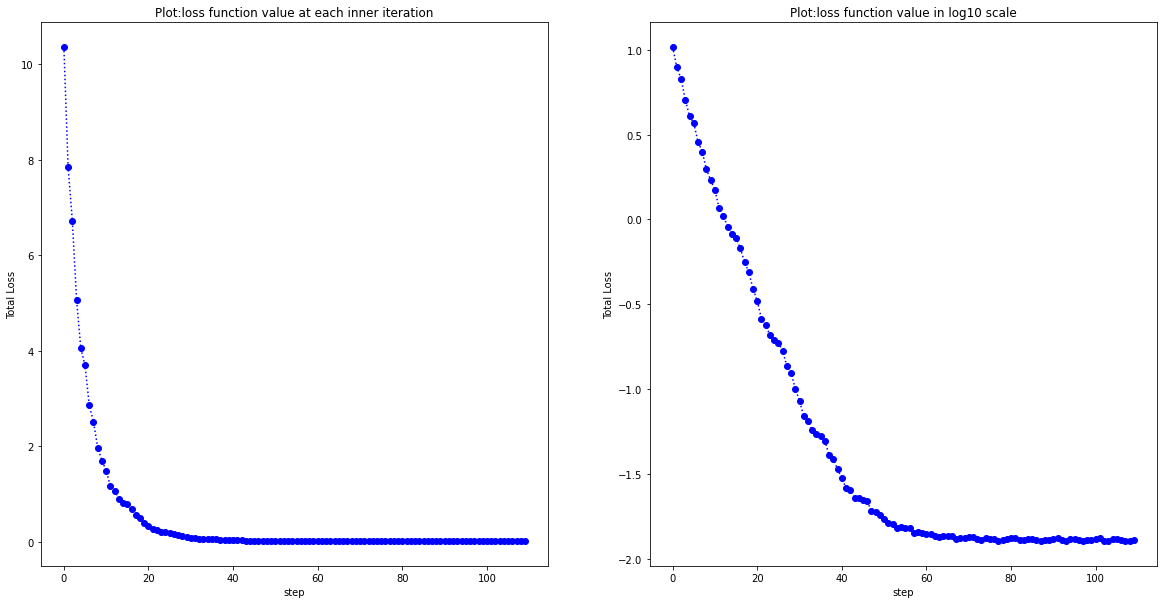

In [ ]:
# SGD
batch_size = 5 # 배치 크기
lr = 0.1 # 학습률
MaxEpochs = 10 # 반복 횟수

paths = []
batch_loss = []
w0 = np.array([-4.0, -1.0]) # 1) 초깃값
search_direction = np.zeros_like(w0)

#
loss_epoch = []
GLoss_batch = []

print(search_direction)

# 2) 데이터 셔플링
np.random.seed(320)

idx = np.arange(len(x_train))
np.random.shuffle(idx)

shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]

print(shuffled_x_train)
print()
print(shuffled_y_train)
print()

# 알고리즘
for epoch in range(MaxEpochs+1): # 5) MaxEpochs번 반복

    ## DIY(4)
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 배치 생성

        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))

        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 배치에서 그래디언트 계산
        search_direction = -grad # 4)-2 탐색 방향 설정
        lr = lr # 4)-3 학습률 설정
        # 4)-4 파라미터 업데이트
        dw = lr * search_direction
        w0 = w0 + dw

    #print('{:02d}\t{}\t{:5.8f}'.format(epoch, w0, loss(w0, x_train, y_train)))
        GLoss_batch.append(loss(w0, x_train, y_train))

    loss_epoch.append(loss(w0, x_train, y_train))
    print('{:02d}\t{}\t{:e}'.format(epoch, w0, loss(w0, x_train, y_train)))


##
print()
print('찾아진 회귀곡선의 기울기와 절편')
print(w0)
print()
## 개별 추가 작성
plt.figure()
plt.plot(loss_epoch, 'bo:')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Plot:loss function value after each epoch')
plt.show()

##

## 추가: Global Loss 관찰을 위한 plot
plt.subplots(1,2, figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(GLoss_batch, 'bo:')
plt.xlabel('step')
plt.ylabel('Total Loss')
plt.title('Plot:loss function value at each inner iteration')

plt.subplot(1,2,2)
plt.plot(np.log10(GLoss_batch), 'bo:')
plt.xlabel('step')
plt.ylabel('Total Loss')
plt.title('Plot:loss function value in log10 scale')
plt.show()


# **SGD: Part-B**

### SGD 알고리즘: 관찰(1)
- 시각화(1): 손실함숫값이 최소로 접근해 가는 과정

In [ ]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (16./3, 3)

def contour_with_path(l, x, y, paths, norm=LogNorm(), level=np.logspace(0, 5, 35), minima=None):
    paths = np.array(paths).T
    fig, ax = plt.subplots(figsize=(7, 4))

    ax.contour(x, y, l, levels=level, norm=norm, cmap=plt.cm.jet)
    ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], \
              scale_units='xy', angles='xy', scale=1, color='k')

    if minima is not None:
        ax.plot(*minima, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    plt.show()


In [ ]:
W0 = np.linspace(-5, 7, 101)
W1 = np.linspace(-2, 5, 101)
W0, W1 = np.meshgrid(W0,W1)
LOSSW = W0 * 0
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        wij = np.array([W0[i,j], W1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

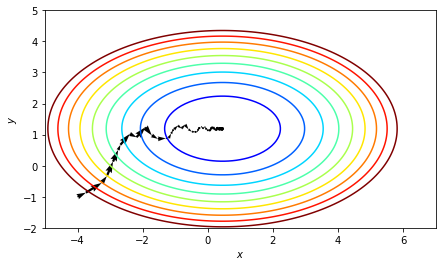

In [ ]:
contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))

### SGD 알고리즘: 관찰(2)
- 시각화(2): 매 에포크 을 통해 찾아진 가중치(weights; 선형회귀곡선의 기울기/절편)의 근삿값에 대한 '손실함숫값'

110

[7.30686267e+00 1.33622796e+01 4.79906072e+00 7.17449968e+00
 4.68310388e+00 1.74942522e+00 5.33253700e+00 3.00296569e+00
 3.84268106e+00 2.40948673e+00 2.03337281e+00 2.46224097e+00
 7.37362368e-01 9.26087590e-01 5.68158695e-01 2.69702648e-01
 8.43522530e-01 9.02439958e-01 6.17916574e-01 7.10563436e-01
 5.88815278e-01 5.63694356e-01 1.42555825e-01 2.28561369e-01
 1.18546111e-01 7.57957827e-02 1.60084206e-01 2.63329714e-01
 1.07193777e-01 1.73508101e-01 1.78438982e-01 1.33600208e-01
 2.71842735e-02 7.94227533e-02 3.54448652e-02 3.32098593e-02
 2.98478907e-02 8.95191549e-02 1.78541004e-02 4.60478164e-02
 6.79311395e-02 3.46740401e-02 1.06252285e-02 3.82219337e-02
 1.81861785e-02 2.29478186e-02 6.71589567e-03 3.96177073e-02
 6.77882869e-03 1.80106686e-02 3.58607828e-02 1.15557033e-02
 1.14510166e-02 2.47916806e-02 1.46643935e-02 2.02857709e-02
 4.24145741e-03 2.34731830e-02 8.45241492e-03 1.22192780e-02
 2.53123997e-02 5.97044916e-03 1.38047310e-02 1.97672593e-02
 1.40291869e-02 1.9

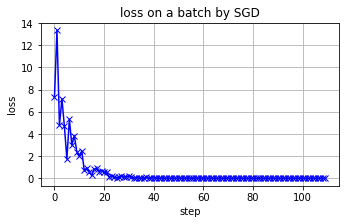

In [ ]:
print(len(batch_loss))
print()

print(np.array(batch_loss).T)

plt.plot(batch_loss, 'x-b', markerfacecolor='none')
plt.grid()
plt.xlabel('step')
plt.ylabel('loss')
plt.title('loss on a batch by SGD')
plt.show()

### Revisit
- 시각화: visualize_l2


---


- 시각화를 위해 사용할 모듈
  - "from matplotlib.patches import Rectangle"
    - 웹자료(1): [Matplotlib: Rectangle](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)
    - 웹자료(2): [Matplotlib: box for error bar](https://matplotlib.org/stable/gallery/statistics/errorbars_and_boxes.html#sphx-glr-gallery-statistics-errorbars-and-boxes-py)

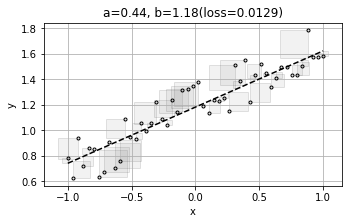

In [ ]:
from matplotlib.patches import Rectangle
def visualize_l2(w, b, x_train, y_train, loss):
    from matplotlib.patches import Rectangle
    loss_name = 'loss'
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, w * x_train + b, '--k')
    currentAxis = plt.gca()
    for xx,yy in zip(x_train, y_train):
        currentAxis.add_patch(Rectangle((xx, yy),
                                        w * xx + b - yy, w * xx + b - yy,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("a={:1.2f}, b={:1.2f}(loss={:5.4f})".format(w, b, loss))
    plt.show()

visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))

# **III. 적응형 알고리즘**
- GD & SGD 대비 주요한 차이점
  - **학습률 선택 방법**

- GD & SGD: 상수의 고정된 학습률 사용에 따른 한계점
  - 상대적으로 작은 학습률: 수렴 (ok) vs 수렴속도 (느림)
  - 상대적으로 큰 학습률: 폭발(blow-up) 현상

- 해결 방안: 적응형 알고리즘 (adaptive algo.)

- **주요 적응형 알고리즘**
  - Type-1: 기본
  - Type-2: AdaGrad
  - Type-3: RMSProp
  - Type-4: Adam
* version(1): 테스트시 초깃값=(4,-1) 선택

# **Type-1**
- **매 batch iteration**에서 **학습률 변화 여부를 결정**함
 - 결정에 있어서의 기준: $Loss(w_{old}),Loss(w_{new}) $ 비교

- 테스트시 초깃값=(4,-1) 선택

01	[0.45239109 1.10966911]	0.0195
02	[0.46186493 1.19057288]	0.0128
03	[0.4600726  1.19229081]	0.0128
------------------------------
LR at last epoch 0.0009765625


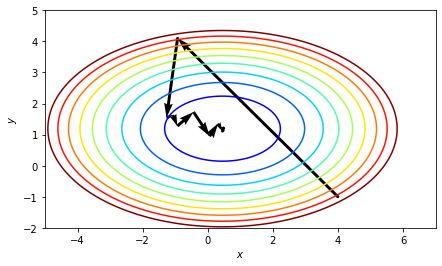

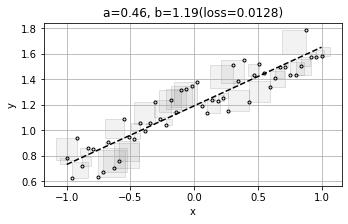

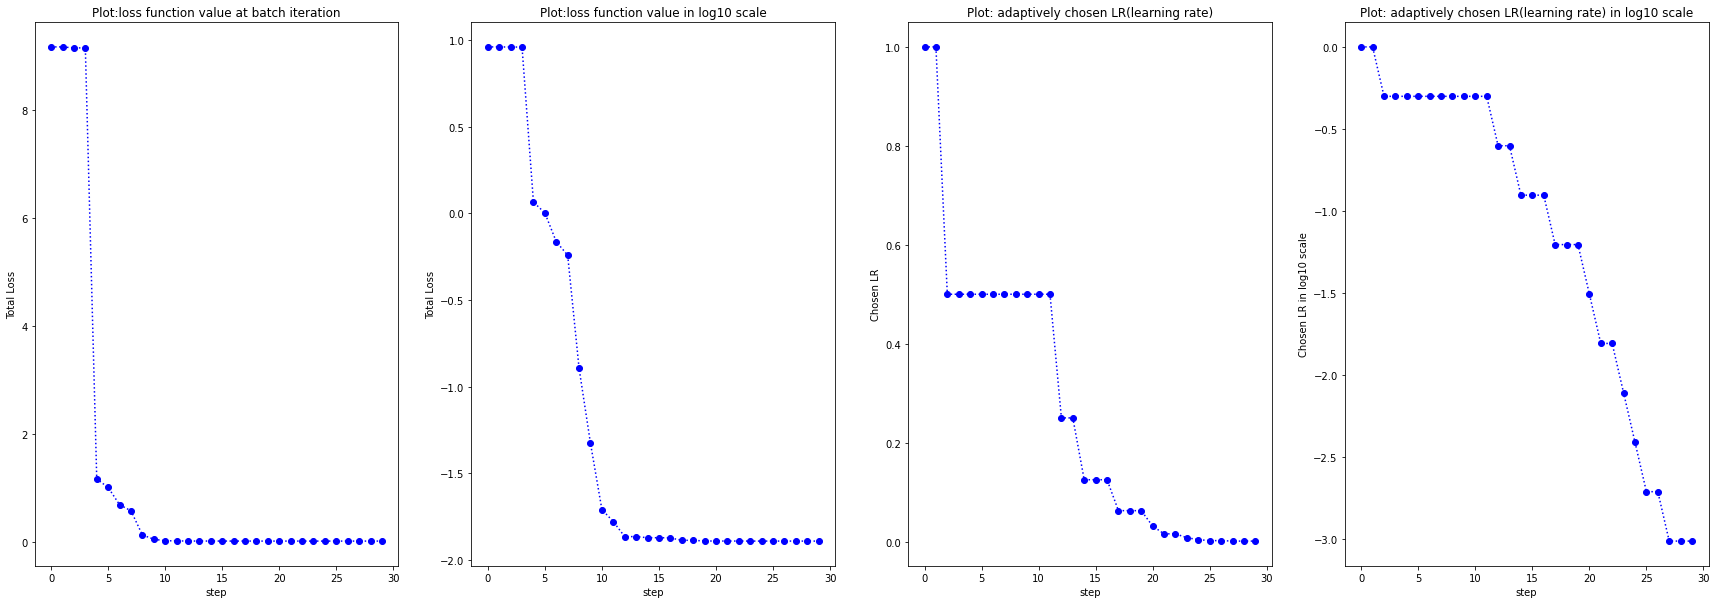

In [ ]:
# 적응형 알고리즘
batch_size = 5 # batch size
lr = 2 # 학습률
MaxEpochs = 2 # 반복 횟수
search_direction = np.zeros_like(w0)

paths = []
batch_loss = []
GLoss_batch = []
LR_batch = []
w0 = np.array([4.0, -1.0]) # 1) 초깃값

# 2) 데이터 셔플링: 선택적(생략 가능)
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)
shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]


# 알고리즘
for epoch in range(MaxEpochs+1): # 5) MaxEpochs번 반복

    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) mini-batch 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 mini-batch에서 그래디언트 계산
        search_direction = -grad # 4)-2 탐색 방향 설정
        lr = lr # 4)-3 학습률 설정

        # 4)-4 파라미터 업데이트
        dw = lr * search_direction
        w1 = w0 + dw

#(추가or변경)
        # 적응형 알고리즘 예
        loss0, loss1 = loss(w0, x_train, y_train), loss(w1, x_train, y_train)
        GLoss_batch.append(loss(w0, x_train, y_train))

        if loss0 > loss1:   #의미: 업데이트된 'w1'은 손실함숫값이 증가하는 방향으로 이동됨.
            w0 = w1
        else:
            lr = lr / 2

        LR_batch.append(lr)
    print('{:02d}\t{}\t{:5.4f}'.format(epoch+1, w0, loss(w0, x_train, y_train)))

print('------------------------------')
print('LR at last epoch', lr)
contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))

## 추가: Global Loss 관찰을 위한 plot
plt.subplots(1,4, figsize=(30,10))

plt.subplot(1,4,1)
plt.plot(GLoss_batch, 'bo:')
plt.xlabel('step')
plt.ylabel('Total Loss')
plt.title('Plot:loss function value at batch iteration')

plt.subplot(1,4,2)
plt.plot(np.log10(GLoss_batch), 'bo:')
plt.xlabel('step')
plt.ylabel('Total Loss')
plt.title('Plot:loss function value in log10 scale')

plt.subplot(1,4,3)
plt.plot(LR_batch, 'bo:')
plt.xlabel('step')
plt.ylabel('Chosen LR')
plt.title('Plot: adaptively chosen LR(learning rate)')

plt.subplot(1,4,4)
plt.plot(np.log10(LR_batch), 'bo:')
plt.xlabel('step')
plt.ylabel('Chosen LR in log10 scale')
plt.title('Plot: adaptively chosen LR(learning rate) in log10 scale')

plt.show()

# **Type-2: AdaGrad**

- **매 batch iteration**에서 **학습률 업데이트**함
 - 결정에 있어서의 기준: 장기 누적 gradient 이용

- 테스트시 초깃값=(2,4) 선택
- 살펴 볼 결과: **1st epoch/1st batch iteraion 에서의 gradient 성분** (즉, 각 변수(기울기, 절편)에 대한 편미분계수의 '크기')

* 알고리즘의 주요 단계
 -  $r^{(k+1)} = r^{(k)} + \nabla L(w^{(k)}) \odot \nabla L(w^{(k)}) $
 - $w^{(k+1)} = w^{(k)} - \frac{\epsilon}{\delta+\sqrt{r^{(k+1)}}} \odot \nabla L(w^{(k)})$


*[추가] 참고사항
- **AdaGrad 특성**
 - 아래로 볼록한 (convex) 손실함수를 갖는 모델에서 수렴성 우수
 - 초기 단계(gradient 값의 변화가 많은 경우): 수렴속도가 급격히 느려짐 (cf. loss 함숫값 그래프 참고 가능)

- **AdaGrad 약점**
 1. convexity를 갖지 않는 신경망(neural network) 모델에서 수렴성 나쁜 편임.
 1. **반복횟수(epoch)이 많은 후반**으로 갈수록(-> 누적 gradient 값(r)이 커짐) 'dw 가 작은 값'에 대응 ---> 최솟값 도달 여부에 관계없이 **w값 업데이트 되지 않음**(즉, 최솟값으로 **수렴하지 않음**)

Iter	w_k		grad		dw		loss
1-00	[2.00 4.00]
1-01	[3.00 3.00]	[-0.60 4.71]	[1.00 -1.00]	5.5308
1-02	[2.02 2.45]	[2.79 3.12]	[-0.98 -0.55]	2.4452
1-03	[1.81 2.15]	[0.61 1.80]	[-0.21 -0.30]	1.5642
1-04	[1.55 1.78]	[0.79 2.34]	[-0.26 -0.37]	0.7745
1-05	[1.35 1.54]	[0.63 1.56]	[-0.21 -0.24]	0.4102
1-06	[1.28 1.43]	[0.20 0.75]	[-0.06 -0.11]	0.3059
1-07	[1.00 1.25]	[0.90 1.15]	[-0.28 -0.17]	0.1206
1-08	[0.92 1.26]	[0.27 -0.05]	[-0.08 0.01]	0.0926
1-09	[0.73 1.16]	[0.63 0.70]	[-0.19 -0.10]	0.0398
1-10	[0.64 1.21]	[0.28 -0.33]	[-0.09 0.05]	0.0254
2-01	[0.63 1.20]	[0.05 0.03]	[-0.02 -0.00]	0.0232
2-02	[0.57 1.20]	[0.20 0.05]	[-0.06 -0.01]	0.0172
2-03	[0.52 1.22]	[0.16 -0.15]	[-0.05 0.02]	0.0149
2-04	[0.53 1.23]	[-0.03 -0.05]	[0.01 0.01]	0.0158
2-05	[0.51 1.23]	[0.05 -0.00]	[-0.01 0.00]	0.0152
2-06	[0.51 1.22]	[0.01 0.04]	[-0.00 -0.01]	0.0147
2-07	[0.48 1.20]	[0.12 0.13]	[-0.04 -0.02]	0.0130
2-08	[0.50 1.19]	[-0.09 0.09]	[0.03 -0.01]	0.0135
2-09	[0.46 1.17]	[0.15 0.12]	[-0.05 -0.02]	0.0132
2-10	[0.

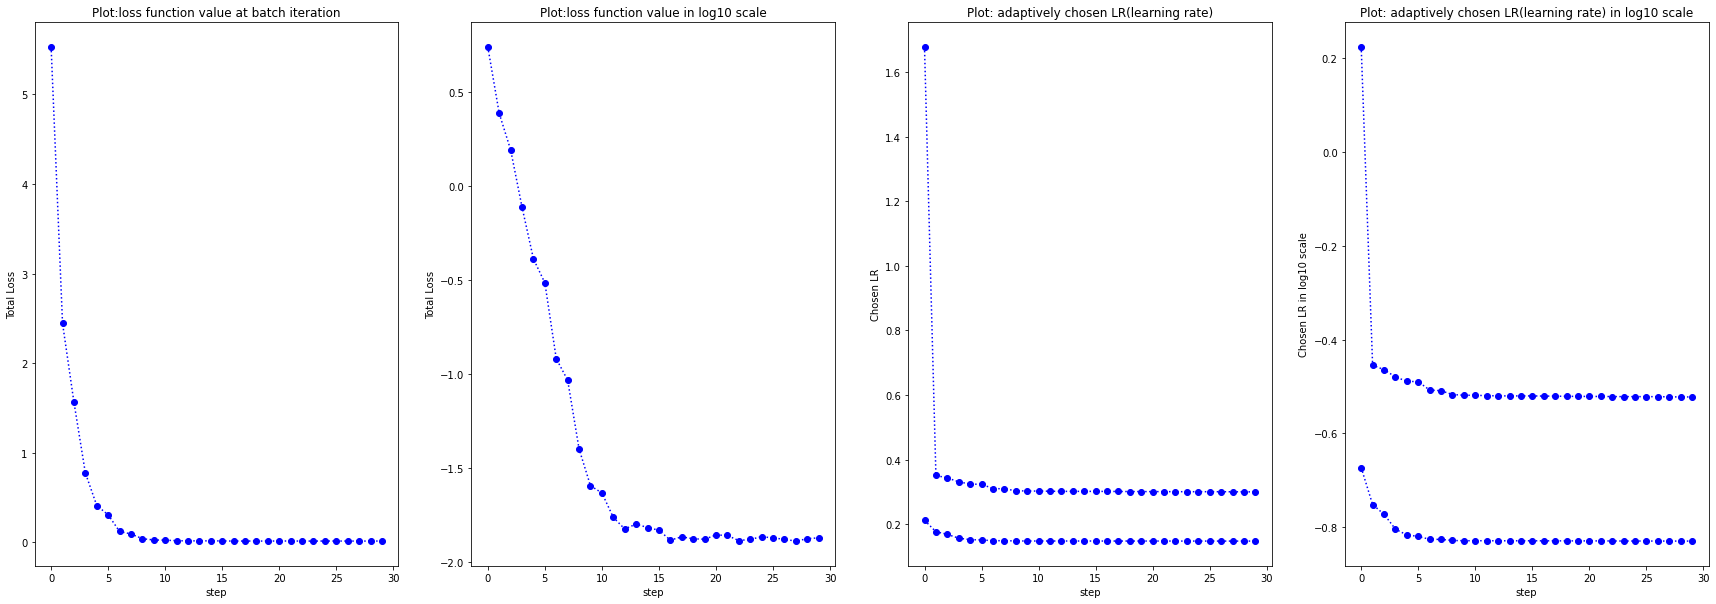

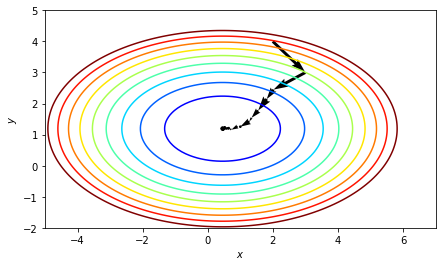

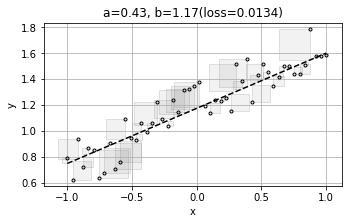

In [ ]:
batch_size = 5 # batch
MaxEpochs = 3 # epoch: 2-->3

#(추가or변경)
epsilon = 1.0
#delta = 1E-7
delta = 0.0
r = np.zeros_like(w0)


paths = []
batch_loss = []
GLoss_batch = []
LR_batch = []

w0 = np.array([2.0, 4.0]) # 1) 초깃값
print('Iter\tw_k\t\tgrad\t\tdw\t\tloss')
print('{:01d}-{:02d}\t{}'.format(1,0,np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x})))

# 2) 데이터 셔플링: 선택적(생략 가능)
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)
shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]



# 알고리즘
for epoch in range(MaxEpochs): # 5) MaxEpochs번 반복
    k = 0
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        search_direction = -grad # 4)-2 탐색 방향 설정

#(추가or변경)
        # 4)-3 학습률 설정
        r = r  + grad * grad
        lr = epsilon / (delta + np.sqrt(r))

        dw = lr * search_direction # 4)-4 파라미터 업데이트
        w0 = w0 + dw
        print('{:01d}-{:02d}\t{}\t{}\t{}\t{:5.4f}'.format(epoch+1,k +1,
                                                  np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(grad, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(dw, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  loss(w0, x_train, y_train)))
        k += 1
        GLoss_batch.append(loss(w0, x_train, y_train))
        LR_batch.append(lr)
#print(LR_batch)

## 추가: Global Loss 관찰을 위한 plot
plt.subplots(1,4, figsize=(30,10))

plt.subplot(1,4,1)
plt.plot(GLoss_batch, 'bo:')
plt.xlabel('step')
plt.ylabel('Total Loss')
plt.title('Plot:loss function value at batch iteration')

plt.subplot(1,4,2)
plt.plot(np.log10(GLoss_batch), 'bo:')
plt.xlabel('step')
plt.ylabel('Total Loss')
plt.title('Plot:loss function value in log10 scale')

plt.subplot(1,4,3)
plt.plot(LR_batch, 'bo:')
plt.xlabel('step')
plt.ylabel('Chosen LR')
plt.title('Plot: adaptively chosen LR(learning rate)')

plt.subplot(1,4,4)
plt.plot(np.log10(LR_batch), 'bo:')
plt.xlabel('step')
plt.ylabel('Chosen LR in log10 scale')
plt.title('Plot: adaptively chosen LR(learning rate) in log10 scale')

plt.show()

contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))

# **Type-3: RMSProp**
- **R**oot **M**ean **S**quare **Prop**agation
- 누적 gradient 이용: 단기

- AdaGrad의 **약점(2) 보완**을 위한 **RMSProp**
 - 약점: **반복횟수(epoch)이 많은 후반**으로 갈수록(-> 누적 gradient 값(r)이 커짐) 'dw 가 작은 값'에 대응 ---> 최솟값 도달 여부에 관계없이 **w값 업데이트 되지 않음**(즉, 최솟값으로 **수렴하지 않음**)
 - 보완 방법: gradient 누적합을 계산에 있어, '현재의 gradient'와 '이전 단계까지 누적된 gradient 합'에 대해 가중치를 달리하여 적용(즉, **이동평균 사용**)

* 알고리즘의 주요 단계 ($\rho$: forgetting factor)
 -  $r^{(k+1)} = \rho r^{(k)} + (1-\rho) \nabla L(w^{(k)}) \odot \nabla L(w^{(k)}) $
 - $w^{(k+1)} = w^{(k)} - \frac{\epsilon}{\delta+\sqrt{r^{(k+1)}}} \odot \nabla L(w^{(k)})$
 - $\rho$ 선택 예: 0.9

In [ ]:
# RMSProp
batch_size = 5 # batch 크기
MaxEpochs = 3 # epoch 수:2-->3

'''#(추가or변경)
epsilon = 0.25
#epsilon = 1.0
delta = 1E-10
#delta = 0.0
rho = 0.9
r = np.zeros_like(w0)
'''

paths = []
batch_loss = []
GLoss_batch = []
LR_batch = []

w0 = np.array([2.0, 4.0]) # 1) 초깃값
print('Iter\tw_k\t\tgrad\t\tdw\t\tloss')
print('{:01d}-{:02d}\t{}'.format(1,0,np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x})))

# 2) 데이터 셔플링: 선택적(생략 가능)
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)
shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]



# 알고리즘
for epoch in range(MaxEpochs): # 5) MaxEpochs번 반복
    k = 0
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) mini-batch 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))

        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 mini-batch에서 gradient 계산
        search_direction = -grad # 4)-2 탐색 방향 설정

'''#(추가or변경)
        # 4)-3 학습률 설정
        r = rho * r  + (1. - rho) * grad * grad

        lr = epsilon /(delta + np.sqrt(r))
        #lr = epsilon / np.sqrt(delta + r)
'''
        dw = lr * search_direction # 4)-4 파라미터 업데이트
        w0 = w0 + dw
        print('{:01d}-{:02d}\t{}\t{}\t{}\t{:5.4f}'.format(epoch+1,k +1,
                                                  np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(grad, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(dw, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  loss(w0, x_train, y_train)))
        k += 1
        GLoss_batch.append(loss(w0, x_train, y_train))
        LR_batch.append(lr)

## 추가: Global Loss 관찰을 위한 plot
plt.subplots(1,4, figsize=(30,10))

plt.subplot(1,4,1)
plt.plot(GLoss_batch, 'bo:')
plt.xlabel('step')
plt.ylabel('Total Loss')
plt.title('Plot:loss function value at batch iteration')

plt.subplot(1,4,2)
plt.plot(np.log10(GLoss_batch), 'bo:')
plt.xlabel('step')
plt.ylabel('Total Loss')
plt.title('Plot:loss function value in log10 scale')

plt.subplot(1,4,3)
plt.plot(LR_batch, 'bo:')
plt.xlabel('step')
plt.ylabel('Chosen LR')
plt.title('Plot: adaptively chosen LR(learning rate)')

plt.subplot(1,4,4)
plt.plot(np.log10(LR_batch), 'bo:')
plt.xlabel('step')
plt.ylabel('Chosen LR in log10 scale')
plt.title('Plot: adaptively chosen LR(learning rate) in log10 scale')

plt.show()

contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))

# **Type-4: Adam**
- **Ada**ptive **M**oments 방법
- Hybrid 방법: 'Momentum 방법' + 'RMSProp 방법'
- 특성
 - **학습률과 탐색방향에 대해 적응형(adaptive) 접근**
 - 가중치 형태: **지수적 이동평균** 이용
 - **딥러닝**을 위한 수치최적화 알고리즘 중 **가장 안정적**임.(즉. **convexity를 갖지 않는 손실함수**에 대해 좋은 성능을 보임)
- (국소) 최솟값 근처에서 나선형 수렴 경로를 보임(더 좋은 국소최솟값으로 갈 확률을 높여줌)


* 알고리즘의 주요 단계 ($\rho$: forgetting factor)
 - $d^{(k+1)} = \rho_{1} d^{(k)} + (1-\rho_{1}) \nabla L(w^{(k)}) $
 -  $r^{(k+1)} = \rho_{2} r^{(k)} + (1-\rho_{2}) \nabla L(w^{(k)}) \odot \nabla L(w^{(k)}) $
 - $\hat{d}^{(k+1)}=\frac{\hat{d}^{(k+1)}}{1-\rho_{1}^{k+1}}$
 - $\hat{r}^{(k+1)}=\frac{\hat{r}^{(k+1)}}{1-\rho_{2}^{k+1}}$
 - $w^{(k+1)} = w^{(k)} - \frac{\epsilon}{\delta+\sqrt{\hat{r}^{(k+1)}}} \odot \hat{d}^{(k+1)}$
 - $\rho_1,\rho_2$ 선택 예: $\rho_1=0.9,\rho_2=0.999$

In [ ]:
# Adam
batch_size = 5 # batch 크기
MaxEpochs = 10 # epoch 수: 3-->10

'''#(추가or변경)
epsilon = 1.0
delta = 1E-8

rho1 = 0.9
rho2 = 0.999
d = np.zeros_like(w0)
r = np.zeros_like(w0)
t = 0
'''


paths = []
batch_loss = []
GLoss_batch = []
LR_batch = []

w0 = np.array([2.0, 4.0]) # 1) 초깃값
print('Iter\tw_k\t\tgrad\t\tdw\t\tloss')
print('{:01d}-{:02d}\t{}'.format(1,0,np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x})))

# 2) 데이터 셔플링: 선택적(생략 가능)
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)
shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]


# 알고리즘
for epoch in range(MaxEpochs): # 5) MaxEpochs번 반복
    k = 0
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산

''' #(추가or변경)
        d = rho1 * d  + (1. - rho1) * grad
        r = rho2 * r  + (1. - rho2) * (grad * grad)
        t += 1
        dhat = d / ( 1. - rho1 ** t)
        rhat = r / ( 1. - rho2 ** t)

        search_direction = -dhat # 4)-2 탐색 방향 설정

        # 4)-3 학습률 설정
        lr = epsilon / (delta + np.sqrt(rhat))
'''

        dw = lr * search_direction # 4)-4 파라미터 업데이트
        w0 = w0 + dw
        print('{:01d}-{:02d}\t{}\t{}\t{}\t{:5.4f}'.format(epoch+1,k +1,
                                                  np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(search_direction, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(dw, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  loss(w0, x_train, y_train)))
        k += 1
        GLoss_batch.append(loss(w0, x_train, y_train))
        LR_batch.append(lr)

# 추가: Global Loss 관찰을 위한 plot
plt.subplots(1,4, figsize=(30,10))

plt.subplot(1,4,1)
plt.plot(GLoss_batch, 'bo:')
plt.xlabel('step')
plt.ylabel('Total Loss')
plt.title('Plot:loss function value at batch iteration')

plt.subplot(1,4,2)
plt.plot(np.log10(GLoss_batch), 'bo:')
plt.xlabel('step')
plt.ylabel('Total Loss')
plt.title('Plot:loss function value in log10 scale')

plt.subplot(1,4,3)
plt.plot(LR_batch, 'bo:')
plt.xlabel('step')
plt.ylabel('Chosen LR')
plt.title('Plot: adaptively chosen LR(learning rate)')

plt.subplot(1,4,4)
plt.plot(np.log10(LR_batch), 'bo:')
plt.xlabel('step')
plt.ylabel('Chosen LR in log10 scale')
plt.title('Plot: adaptively chosen LR(learning rate) in log10 scale')

plt.show()

contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))